In [59]:
import pandas as pd
import folium
from folium import plugins
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("도로위험상황예보.csv")
# Read the CSV data into a pandas DataFrame
columns_of_interest = ["RSK_ELMN_NM","RSK_ELMN_GRD",
                       "RN_1HR","AIRTP","LOT","LAT",
                       "LOTNO_ADDR","ROAD_NM_ADDR",
                       ]
                       
# 각 열의 데이터를 리스트로 생성
lists_of_columns = {col: df[col][1:].tolist() for col in columns_of_interest}

# 출력
for col, data_list in lists_of_columns.items():
    print(f"{col} : {data_list[:99]}")  # 첫 5개 항목만 출력 (테스트용)
data_list = data_list[:99]

df['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')  # LAT 열을 숫자형으로 변환 (변환 불가능한 값은 NaN으로 처리)
df['LOT'] = pd.to_numeric(df['LOT'], errors='coerce')  # LOT 열을 숫자형으로 변환 (변환 불가능한 값은 NaN으로 처리)

map_center = [df['LAT'][1:].mean(), df['LOT'][1:].mean()]  # 0번 인덱스 제외하고 평균 계산
print()
# 지도 초기화
m = folium.Map(location=map_center, zoom_start=7)

# 각 위치에 마커 추가 (이 부분은 기존과 동일)
for idx, row in df.iterrows():
    lat = float(row['LAT'])  # LAT 값 파싱
    lot = float(row['LOT'])  # LOT(경도) 값 파싱
    
    if idx > 0:  # 첫 번째 항목(인덱스 0)은 제외하고 시작
        risk_name = row['RSK_ELMN_NM']
        risk_grade = row['RSK_ELMN_GRD']
        precipitation = row['RN_1HR']
        temperature = row['AIRTP']
        lot_address = row['LOTNO_ADDR']
        road_address = row['ROAD_NM_ADDR']

        popup_text = f"""위험 요소: {risk_name}<br>
                         위험 등급: {risk_grade}<br>
                         강수량 (1시간): {precipitation}mm<br>
                         기온: {temperature}°C<br>
                         지번 주소: {lot_address}<br>
                         도로명 주소: {road_address}"""

        # 경도와 위도를 이용하여 마커 추가
        folium.Marker(
            location=[lat, lot],
            popup=popup_text,
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(m)

m


RSK_ELMN_NM : ['SF20304', 'SF20302', 'SF20302', 'SF20304', 'SF20302', 'SF20302', 'SF20302', 'SF20302', 'SF20302', 'SF20302', 'SF20304', 'SF20306', 'SF20304', 'SF20304', 'SF20304', 'SF20302', 'SF20302', 'SF20306', 'SF20304', 'SF20304', 'SF20302', 'SF20302', 'SF20302', 'SF20302', 'SF20302', 'SF20302', 'SF20304', 'SF20302', 'SF20302', 'SF20304', 'SF20302', 'SF20306', 'SF20306', 'SF20306', 'SF20302', 'SF20306', 'SF20302', 'SF20302', 'SF20304', 'SF20306', 'SF20306', 'SF20302', 'SF20302', 'SF20302', 'SF20302', 'SF20302', 'SF20304', 'SF20306', 'SF20302', 'SF20304', 'SF20302', 'SF20302', 'SF20304', 'SF20304', 'SF20304', 'SF20304', 'SF20304', 'SF20302', 'SF20306', 'SF20302', 'SF20306', 'SF20302', 'SF20304', 'SF20304', 'SF20302', 'SF20302', 'SF20302', 'SF20304', 'SF20304', 'SF20304', 'SF20304', 'SF20304', 'SF20304', 'SF20304', 'SF20302', 'SF20304', 'SF20302', 'SF20304', 'SF20304', 'SF20304', 'SF20304', 'SF20304', 'SF20304', 'SF20302', 'SF20302', 'SF20304', 'SF20304', 'SF20304', 'SF20304', 'SF203

In [ ]:
# import requests
# import pandas as pd
# import folium
# import urllib3
# from urllib.parse import urlencode, quote
# # SSL 경고 비활성화
# urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
# # API 정보 설정
# base_url = "https://www.safetydata.go.kr"
# data_name = "/V2/api/DSSP-IF-10005"  # 한글 경로 그대로 사용
# # 서비스 키는 URL 파라미터로 전송
# service_key = "B42F49ZDPKAI36MI"  # 실제 서비스 키를 입력하세요
# # 쿼리 파라미터 설정
# payloads = {
#     "serviceKey": service_key,
#     "returnType": "json",
#     "pageNo": "1",
#     "numOfRows": "100",  # 최대 데이터 로드
# }
# # URL 인코딩
# query_string = urlencode(payloads)
# encoded_data_name = quote(data_name)  # 한글 경로 URL 인코딩
# # 요청 URL 구성
# request_url = f"{base_url}{encoded_data_name}?{query_string}"
# # OpenAPI 데이터 요청
# print(f"요청 URL: {request_url}")  # 디버깅을 위한 요청 URL 출력
# response = requests.get(request_url, verify=False)
# # 상태 코드 및 응답 확인
# if response.status_code == 200:
#     try:
#         data = response.json()
#         print("응답 데이터:", data)  # 응답 데이터 확인
#         if 'response' in data:
#             if data['response']['header']['resultCode'] == '00':
#                 items = data['response']['body']['items']
#                 df = pd.DataFrame(items)
#             else:
#                 print("API 응답 오류:", data['response']['header']['resultMsg'])
#                 df = pd.DataFrame()
#         else:
#             print("응답에서 'response' 키를 찾을 수 없습니다.")
#             print("응답 내용:", data)
#             df = pd.DataFrame()
#     except ValueError:
#         print("JSON 디코딩 오류: 응답 내용을 확인하세요.")
#         print("응답 내용:", response.text)
#         df = pd.DataFrame()
# else:
#     print(f"HTTP 요청 실패: 상태 코드 {response.status_code}")
#     print("응답 내용:", response.text)
#     df = pd.DataFrame()
# # 필요한 열만 리스트로 생성
# if not df.empty:
#     columns_of_interest = ["RSK_ELMN_NM", "RSK_ELMN_GRD", "RN_1HR", "AIRTP", "LOT", "LAT", "LOTNO_ADDR", "ROAD_NM_ADDR"]
#     df = df[columns_of_interest]
#     # LAT와 LOT을 숫자형으로 변환
#     df['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')
#     df['LOT'] = pd.to_numeric(df['LOT'], errors='coerce')
#     df['RN_1HR'] = pd.to_numeric(df['RN_1HR'], errors='coerce')  # 문자열 → 숫자형 변환
#     # 지도 중심 설정 (LAT, LOT의 평균값)
#     map_center = [df['LAT'].mean(), df['LOT'].mean()]
#     # 위험등급별 마커 색상 매핑
#     color_mapping = {
#         "J": "red",
#         "F": "green",
#         "B": "blue",
#     }
#     # 지도 초기화
#     m = folium.Map(location=map_center, zoom_start=7)
#     # 각 위치에 마커 추가
#     for idx, row in df.iterrows():
#         try:
#             lat = float(row['LAT'])
#             lot = float(row['LOT'])
#             risk_name = row['RSK_ELMN_NM']
#             risk_grade = row['RSK_ELMN_GRD']
#             precipitation = row['RN_1HR']
#             temperature = row['AIRTP']
#             lot_address = row['LOTNO_ADDR']
#             road_address = row['ROAD_NM_ADDR']
#             # 마커 팝업 텍스트
#             popup_text = f"""위험 요소: {risk_name}<br>
#                              위험 등급: {risk_grade}<br>
#                              강수량 (1시간): {precipitation}mm<br>
#                              기온: {temperature}°C<br>
#                              도로명 주소: {road_address}"""
#             # 위험등급에 따른 색상 설정
#             marker_color = color_mapping.get(str(risk_grade), "blue")  # 기본 색상은 blue
#             # 마커 추가
#             folium.Marker(
#                 location=[lat, lot],
#                 popup=popup_text,
#                 icon=folium.Icon(color=marker_color, icon='info-sign')
#             ).add_to(m)
#         except (ValueError, TypeError):  # 좌표 값이 비정상일 경우 처리
#             continue
#     m
# else:
#     print("데이터프레임이 비어 있어 지도를 생성할 수 없습니다.")

Temperature statistics by risk grade:
  RSK_ELMN_GRD  min_temp  max_temp  mean_temp  median_temp
0            B       1.0       7.0   5.764706          7.0
1            F       0.0       6.0   1.151515          1.0
2            J      -7.0      -1.0  -2.320000         -1.0

Temperature boundaries based on median values:
B-F: 4.00°C
F-J: 0.00°C


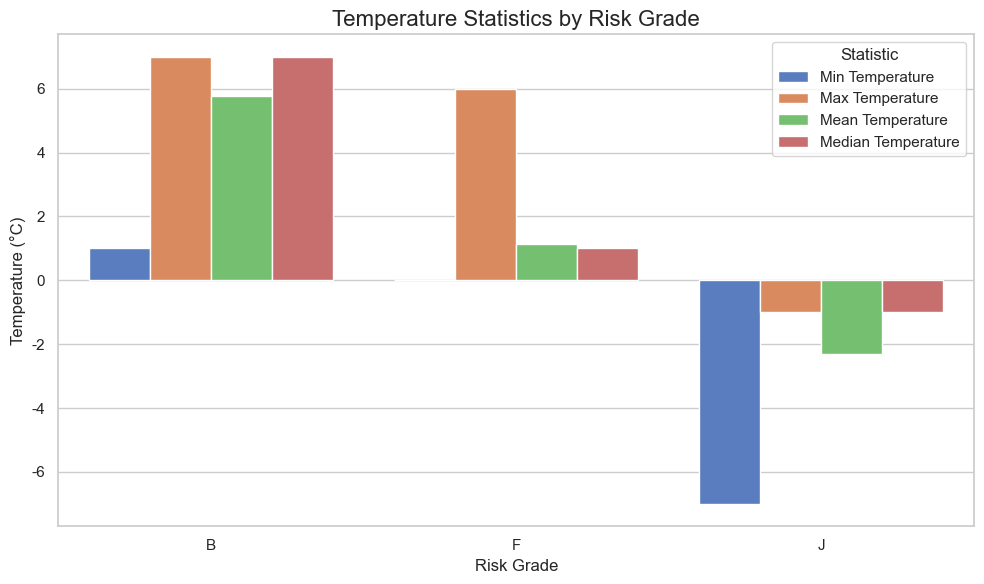

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set the font to support Korean characters
font_path = "C:/Windows/Fonts/malgun.ttf"  # Use the correct font path for Windows
font_prop = fm.FontProperties(fname=font_path)

# Apply the font to matplotlib
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # To display the minus sign correctly

# Load the dataset
df = pd.read_csv("도로위험상황예보.csv")

# Select the relevant columns
columns_of_interest = ["RSK_ELMN_GRD", "RN_1HR", "AIRTP", "LAT", "LOT"]
df = df[columns_of_interest]

# Map risk grade to numeric values
grade_mapping = {"B": 1, "F": 2, "J": 3}
inverse_mapping = {1: "B", 2: "F", 3: "J"}
df["RSK_ELMN_GRD"] = df["RSK_ELMN_GRD"].map(grade_mapping)

# Convert AIRTP to numeric, setting non-numeric values to NaN
df["AIRTP"] = pd.to_numeric(df["AIRTP"], errors="coerce")

# Drop rows with missing values in 'AIRTP' or 'RSK_ELMN_GRD'
df = df.dropna(subset=["AIRTP", "RSK_ELMN_GRD"])

# Calculate temperature statistics by risk grade
grade_stats = df.groupby("RSK_ELMN_GRD")["AIRTP"].agg(
    min_temp="min",
    max_temp="max",
    mean_temp="mean",
    median_temp="median"
).reset_index()

# Map risk grade back to letters
grade_stats["RSK_ELMN_GRD"] = grade_stats["RSK_ELMN_GRD"].map(inverse_mapping)

# Calculate temperature boundaries based on the median temperature
boundaries = {}
for i in range(len(grade_stats) - 1):
    grade1, grade2 = grade_stats.iloc[i], grade_stats.iloc[i + 1]
    boundaries[f"{grade1['RSK_ELMN_GRD']}-{grade2['RSK_ELMN_GRD']}"] = (
        grade1["median_temp"] + grade2["median_temp"]
    ) / 2

# Print the temperature statistics
print("Temperature statistics by risk grade:")
print(grade_stats)
print("\nTemperature boundaries based on median values:")
for boundary, temp in boundaries.items():
    print(f"{boundary}: {temp:.2f}°C")

# Visualization of the temperature statistics by risk grade
sns.set(style="whitegrid")

# Plot the temperature statistics for each risk grade
fig, ax = plt.subplots(figsize=(10, 6))

# Rename columns for readability in the plot
stat_name_mapping = {
    "min_temp": "Min Temperature",
    "max_temp": "Max Temperature",
    "mean_temp": "Mean Temperature",
    "median_temp": "Median Temperature"
}

grade_stats_long = grade_stats.rename(columns=stat_name_mapping).melt(
    id_vars=["RSK_ELMN_GRD"],
    value_vars=list(stat_name_mapping.values()),
    var_name="Statistic",
    value_name="Temperature"
)

sns.barplot(
    data=grade_stats_long,
    x="RSK_ELMN_GRD",
    y="Temperature",
    hue="Statistic",
    palette="muted",
    ax=ax
)

# Add titles and labels
ax.set_title("Temperature Statistics by Risk Grade", fontsize=16)
ax.set_xlabel("Risk Grade", fontsize=12)
ax.set_ylabel("Temperature (°C)", fontsize=12)
ax.legend(title="Statistic")

plt.tight_layout()
plt.show()

# # Plotting the temperature boundaries as a line plot
# boundary_df = pd.DataFrame(boundaries.items(), columns=["Boundary", "Temperature"])

# fig, ax = plt.subplots(figsize=(8, 4))
# sns.lineplot(data=boundary_df, x="Boundary", y="Temperature", marker="o", ax=ax)
# ax.set_title("Temperature Boundaries Between Risk Grades", fontsize=16)
# ax.set_xlabel("Boundary", fontsize=12)
# ax.set_ylabel("Temperature (°C)", fontsize=12)

# plt.tight_layout()
# plt.show()

In [61]:
import requests

def get_user_ip():
    url = "https://api.ipify.org?format=json"
    response = requests.get(url)
    if response.status_code == 200:
        ip = response.json()['ip']
        return ip
    else:
        return "IP를 확인할 수 없습니다."

# 사용자의 IP 출력
print(get_user_ip())

118.127.238.194



=== Page 1 ===

1. 제목: 김문수 "배달종사자 사고 위험…플랫폼 운영사 한파대책 필요"
   링크: https://www.newsis.com/view/NISX20241223_0003007422
   미리보기: 이에 김 장관은 이날 한랭질환 예방 3대 수칙(따뜻한 옷, 물, 쉼터)과 겨울철 교통사고 예방 수칙(빙판길 저속 운전, 안전모 착용) 등을 준수할 것을 요청했다. 아울러 김 장관은 "겨울철 도로 위에서 일하는 배달종사자들의 건강과 안전을 세심하게 관리할 필요가 있다"며 "플랫폼 운영사도 적극적으로 한파 대책을...

2. 제목: 노동당국, 겨울철 화재·폭발·붕괴 등 안전사고 예방 점검
   링크: https://biz.heraldcorp.com/article/10022082?ref=naver
   미리보기: 김문수 고용노동부 장관이 23일 서울 영등포구 타임스퀘어 앞 픽업존에서 겨울철 배달종사자 교통사고와 한랭질환 예방을 위한 안전 ON 캠페인을 하고 있다. [고용노동부 제공] 노동당국이 건설업, 제조업, 물류센터와 같은 택배업, 폐기물처리업 등을 대상으로 겨울철 발생할 수 있는 안전사고를 예방하기 위한...

3. 제목: 겨울철 인기 여행지, 카카오내비가 추천해준다
   링크: https://zdnet.co.kr/view/?no=20241223153314
   미리보기: 이를 통해 카카오내비는 겨울철 안전운전과 사고 예방에 기여할 수 있을 것으로 기대하고 있다. 한국도로교통공단에 따르면 최근 5년간 발생한 노면 결빙 사고는 3천900여 건으로, 결빙 교통사고의 치사율은 일반 교통사고보다 1.7배 높다는 분석이 나온 바 있다. 카카오내비는 지난 9일에도 목적지 설정 없이...

4. 제목: 마산중부署 어린이 교통안전 캠페인 실시
   링크: http://www.gndomin.com/news/articleView.html?idxno=418349
   미리보기: 한편 경찰서에서는 겨울철 교통안전 대책 추진과 함께 동절기 교통사고 예방을 위한 

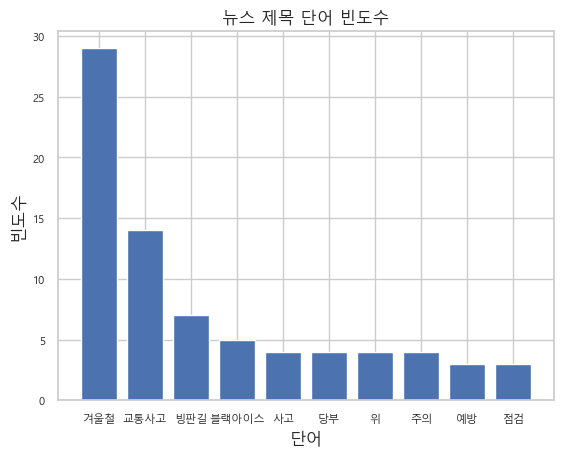

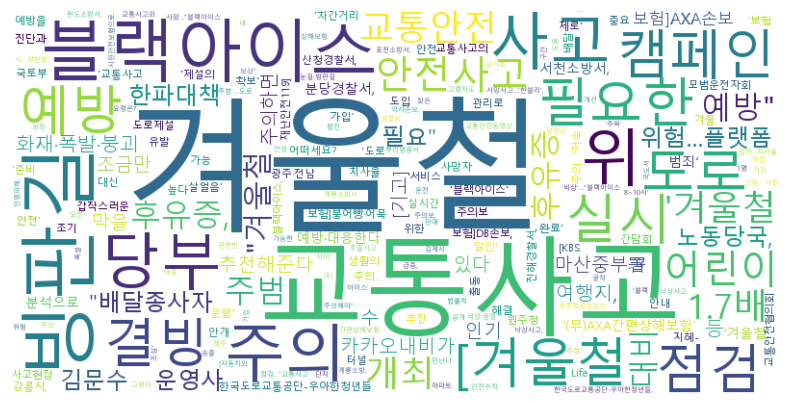

In [62]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 제대로 표시되게 설정

# 검색어 및 URL 설정
search_query = "겨울철 교통사고"
base_url = "https://search.naver.com/search.naver?where=news&query={query}&start={start}"

# 헤더 설정
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"
}

# 뉴스 기사 가져오기 함수 정의
def fetch_news(query, pages):
    news_data = []  # 데이터를 저장할 리스트

    for page in range(1, pages + 1):
        start = (page - 1) * 10 + 1
        url = base_url.format(query=query, start=start)

        # 요청 및 응답 받기
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # 뉴스 기사 정보 가져오기
            news_items = soup.select(".news_area")
            
            print(f"\n=== Page {page} ===\n")
            for idx, item in enumerate(news_items, 1):
                # 제목과 링크 추출
                title = item.select_one(".news_tit").get_text()
                link = item.select_one(".news_tit")['href']
                
                # 미리보기 텍스트 추출
                preview = item.select_one(".dsc_txt_wrap").get_text() if item.select_one(".dsc_txt_wrap") else "No preview available."

                print(f"{idx}. 제목: {title}")
                print(f"   링크: {link}")
                print(f"   미리보기: {preview}\n")

                # 데이터를 리스트에 추가
                news_data.append({"제목": title, "링크": link, "미리보기": preview})
        else:
            print(f"Failed to fetch data for page {page}. Status code: {response.status_code}")

    return news_data

# 단어 빈도수 및 워드클라우드 시각화 함수 정의
def visualize_word_frequency_and_cloud(titles):
    # 모든 제목에서 단어 추출
    words = " ".join(titles).split()
    
    # 단어 빈도 계산
    word_counts = Counter(words)

    # 가장 많이 등장한 단어 10개 선택
    most_common_words = word_counts.most_common(10)

    # 텍스트로 출력
    print("\n단어 빈도수 분석 결과:")
    for word, count in most_common_words:
        print(f"{word}: {count}")

    # 그래프 시각화
    words, counts = zip(*most_common_words)
    plt.bar(words, counts)
    plt.xlabel('단어')
    plt.ylabel('빈도수')
    plt.title('뉴스 제목 단어 빈도수')
    plt.xticks(fontsize=8)  # x축 폰트 크기
    plt.yticks(fontsize=8)  # y축 폰트 크기
    plt.show()

    # 워드클라우드 생성 및 시각화
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('')
    plt.show()

# 실행
def main():
    pages = 5
    news_data = fetch_news(search_query, pages)

    # 데이터를 DataFrame으로 변환
    df = pd.DataFrame(news_data)

    # 엑셀 파일로 저장
    excel_filename = "news_results.xlsx"
    df.to_excel(excel_filename, index=False)
    print(f"\nData saved to {excel_filename}")

    # 제목 단어 빈도수 분석 및 시각화
    titles = df["제목"].tolist()
    visualize_word_frequency_and_cloud(titles)

# 실행
main()

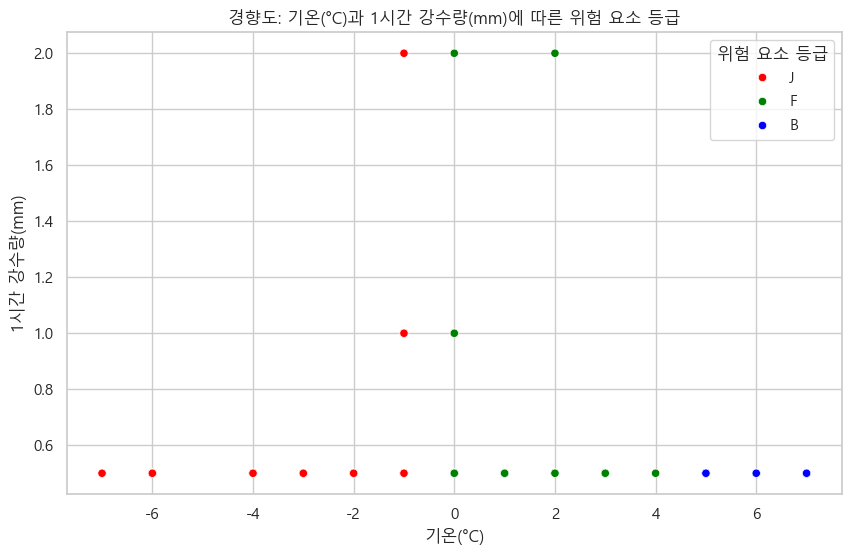

In [63]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 사용 (리눅스에서는 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 제대로 표시되게 설정

# 데이터 로드
df = pd.read_csv("도로위험상황예보.csv")
df['RN_1HR'] = pd.to_numeric(df['RN_1HR'], errors='coerce')  # 문자열 → 숫자형 변환

# 필요한 열만 선택
df = df[['RSK_ELMN_GRD', 'AIRTP', 'RN_1HR']]  

# 첫 번째 인덱스를 제외하고 데이터 저장
df = df.iloc[1:]

# 결측값 제거
df = df.dropna(subset=['RSK_ELMN_GRD', 'AIRTP', 'RN_1HR'])  # 결측값 제거

# AIRTP 열을 숫자형으로 변환 (문자열로 되어 있을 경우 숫자로 변환)
df['AIRTP'] = pd.to_numeric(df['AIRTP'], errors='coerce')

# 기온(AIRTP)의 절댓값을 기준으로 오름차순 정렬
df = df.loc[df['AIRTP'].apply(abs).sort_values().index]

# 위험 요소 등급에 따른 색상 매핑
custom_palette = {
    "J": "red",   # J → 빨간색
    "F": "green", # F → 초록색
    "B": "blue"   # B → 파란색
}

# Seaborn scatterplot으로 경향도 분석
plt.figure(figsize=(10, 6))

# 기온(AIRTP)와 1시간 강수량(RN_1HR)을 'RSK_ELMN_GRD'에 대해 hue로 표시
sns.scatterplot(
    x='AIRTP', 
    y='RN_1HR', 
    hue='RSK_ELMN_GRD', 
    data=df,
    palette=custom_palette,  # 사용자 정의 색상 사용
    hue_order=["J", "F", "B"]  # 범례 순서 지정
)

# 그래프 제목과 레이블 설정
plt.title("경향도: 기온(°C)과 1시간 강수량(mm)에 따른 위험 요소 등급")
plt.xlabel("기온(°C)")
plt.ylabel("1시간 강수량(mm)")

# 범례 설정
plt.legend(title="위험 요소 등급", loc='upper right')

# 그래프 보여주기
plt.show()

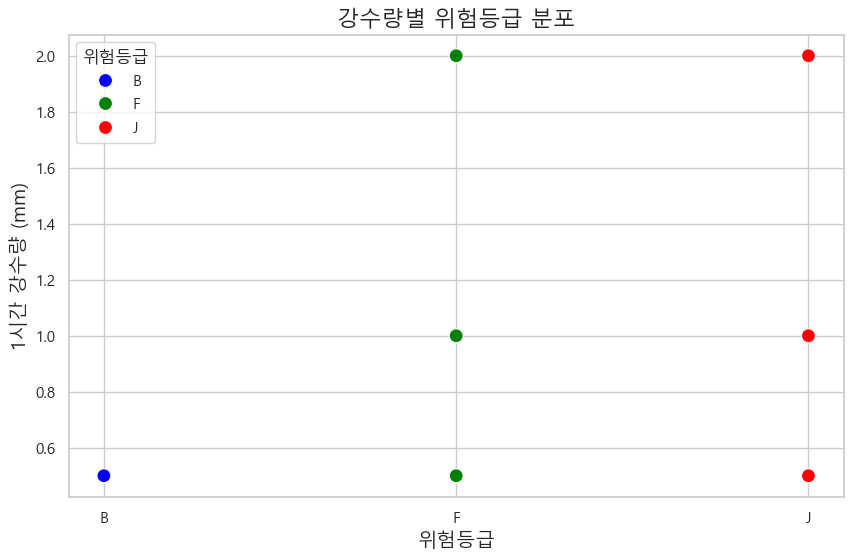

In [64]:
# 강수량과 위험등급 데이터에서 결측값 제거
df_clean = df.dropna(subset=['RN_1HR', 'RSK_ELMN_GRD'])
df['RN_1HR'] = pd.to_numeric(df['RN_1HR'], errors='coerce')  # 문자열 → 숫자형 변환

# RSK_ELMN_GRD 순서 지정 (J, F, B 순으로)
df_clean['RSK_ELMN_GRD'] = pd.Categorical(df_clean['RSK_ELMN_GRD'], categories=['B', 'F', 'J'], ordered=True)

# 색상 맵핑: RSK_ELMN_GRD별 색상 설정
color_mapping = {
    'J': 'red',
    'F': 'green',
    'B': 'blue'
}

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RSK_ELMN_GRD', y='RN_1HR', hue='RSK_ELMN_GRD', data=df_clean,
                palette=color_mapping, s=100, marker='o')

# 그래프 제목과 레이블 설정
plt.title("강수량별 위험등급 분포", fontsize=16)
plt.ylabel("1시간 강수량 (mm)", fontsize=14)
plt.xlabel("위험등급", fontsize=14)

# 범례 순서 설정: J, F, B 순으로 설정
handles, labels = plt.gca().get_legend_handles_labels()
order = ['B', 'F', 'J']
handle_dict = dict(zip(labels, handles))  # 라벨과 핸들을 매핑
ordered_handles = [handle_dict[label] for label in order]  # 순서대로 핸들 정렬
ordered_labels = order  # 라벨 순서

# 범례 추가
plt.legend(handles=ordered_handles, labels=ordered_labels, title='위험등급', loc='upper left')

# 그래프 보여주기
plt.show()

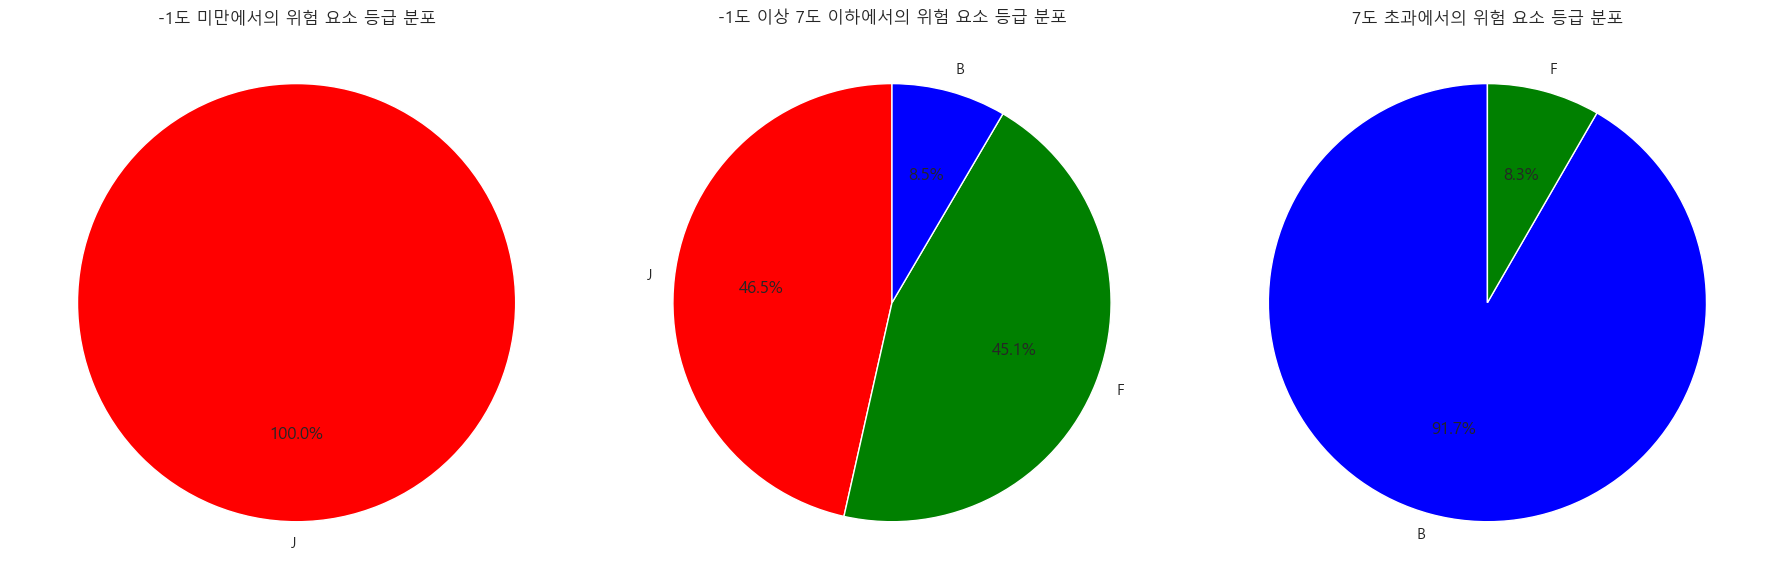

In [ ]:
# 데이터 로드
df = pd.read_csv("도로위험상황예보.csv")

# 필요한 열만 선택
df = df[['RSK_ELMN_GRD', 'AIRTP']]  

# 첫 번째 인덱스를 제외하고 데이터 저장
df = df.iloc[1:]

# 결측값 제거
df = df.dropna(subset=['RSK_ELMN_GRD', 'AIRTP'])  # 결측값 제거

# AIRTP 열을 숫자형으로 변환
df['AIRTP'] = pd.to_numeric(df['AIRTP'], errors='coerce')

# -5도 이하
df_below_mfive = df[df['AIRTP'] < -2]

# -5도 이상 0도 이하
df_below_zero = df[(df['AIRTP'] <= 5.5) & (df['AIRTP'] >= -2)]

# 0도 초과 10도 이하
df_below_five = df[(df['AIRTP'] > 5.5)]

# 위험 요소 등급별 빈도 세기
grade_counts_00 = df_below_zero['RSK_ELMN_GRD'].value_counts()
grade_counts_01 = df_below_mfive['RSK_ELMN_GRD'].value_counts()
grade_counts_02 = df_below_five['RSK_ELMN_GRD'].value_counts()

# 컬러 매핑
color_mapping = {
    "J": "red",
    "F": "green",
    "B": "blue",
}

# 파이 차트를 하나의 화면에 3개 그리기 위한 함수
def plot_pie_chart_subplot(grade_counts, title, ax):
    colors = [color_mapping.get(grade, "gray") for grade in grade_counts.index]
    
    ax.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(title)
    ax.axis('equal')  # 원형으로 표시되도록 설정

# Subplot을 사용하여 3개의 파이 차트를 나란히 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 한 줄에 3개 차트 배치

plot_pie_chart_subplot(grade_counts_01, "-2도 미만에서의 위험 요소 등급 분포", axes[0])
plot_pie_chart_subplot(grade_counts_00, "-2도 이상 5.5도 이하에서의 위험 요소 등급 분포", axes[1])
plot_pie_chart_subplot(grade_counts_02, "5.5도 초과에서의 위험 요소 등급 분포", axes[2])

# 그래프 표시
plt.tight_layout()
plt.show()

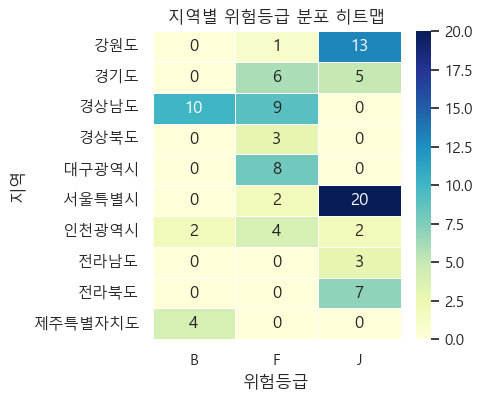

In [66]:
# 데이터 읽기
df = pd.read_csv("도로위험상황예보.csv")

# 주소 처리
address = df['ROAD_NM_ADDR'][1:].str.split().str[0][1:]

# 히트맵 데이터 생성
heatmap_data = df.groupby([address, 'RSK_ELMN_GRD']).size().unstack(fill_value=0)

# x축을 B, F, J 순으로 정렬
heatmap_data = heatmap_data[['B', 'F', 'J']]

# 히트맵 시각화
plt.figure(figsize=(4, 4))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='d', linewidths=.5)

# 그래프 제목과 레이블 설정
plt.title("지역별 위험등급 분포 히트맵")
plt.xlabel("위험등급")
plt.ylabel("지역")

# 그래프 보여주기
plt.show()

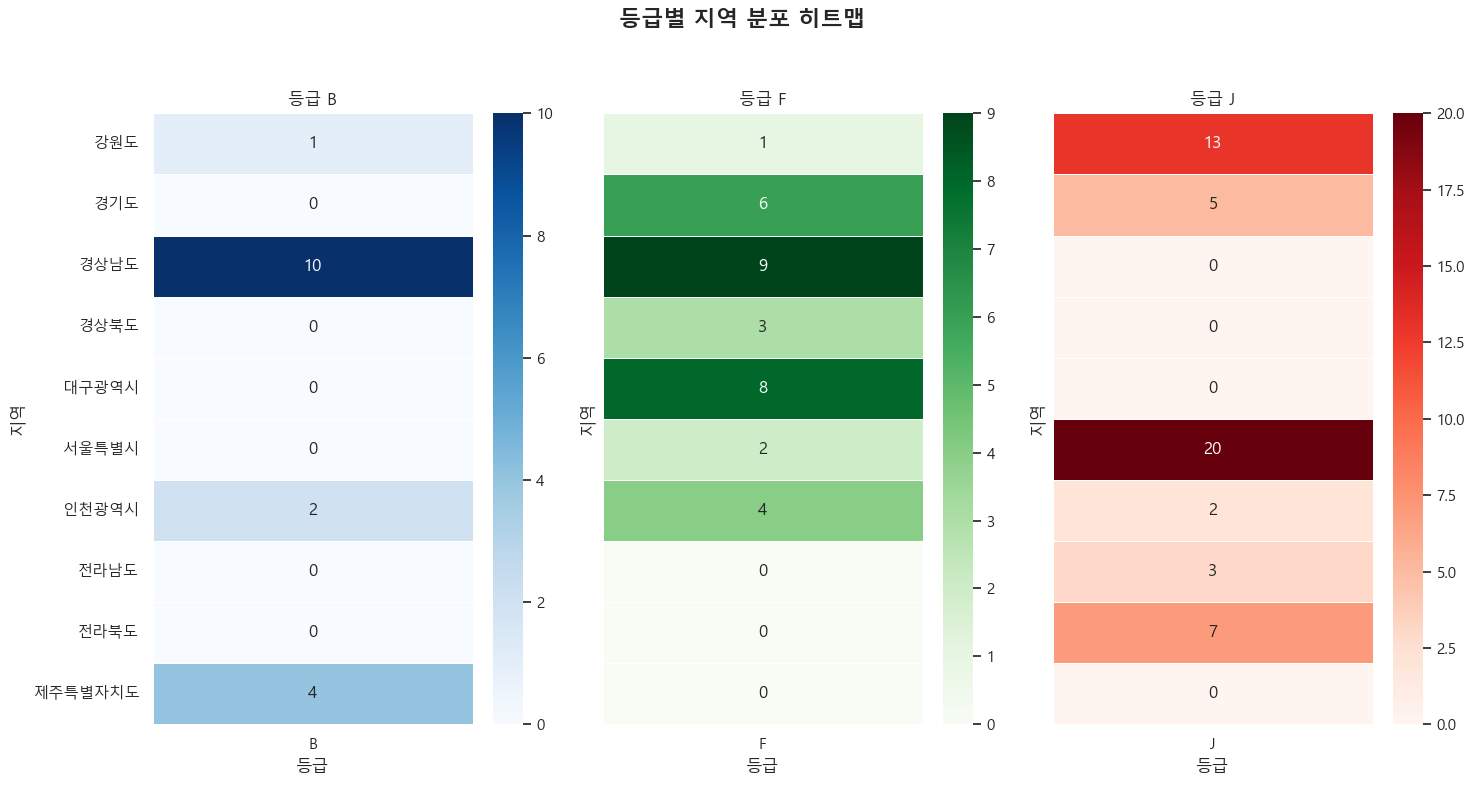

In [67]:
# 데이터 로드
df = pd.read_csv("도로위험상황예보.csv")

# 'ROAD_NM_ADDR'에서 지역 정보 추출 (첫 번째 공백 기준으로 분리하여 첫 단어 가져오기)
df['address'] = df['ROAD_NM_ADDR'][1:].str.split().str[0]

# 'RSK_ELMN_GRD'와 지역별 데이터 그룹화 및 빈도 계산
heatmap_data = df.groupby(['address', 'RSK_ELMN_GRD']).size().unstack(fill_value=0)

# 색상 맵핑: RSK_ELMN_GRD별 색상 설정
grade_colors = {
    "J": "Reds",
    "F": "Greens",
    "B": "Blues"
}

# 개별 등급별로 히트맵 생성
fig, axes = plt.subplots(1, len(heatmap_data.columns), figsize=(15, 8), sharey=True)

for i, grade in enumerate(heatmap_data.columns):
    sns.heatmap(
        heatmap_data[[grade]],  # 특정 등급만 필터링
        annot=True,
        cmap=grade_colors.get(grade, "YlGnBu"),  # 해당 등급에 맞는 색상 사용
        fmt='d',
        linewidths=.5,
        ax=axes[i]
    )
    axes[i].set_title(f"등급 {grade}")
    axes[i].set_xlabel("등급")
    axes[i].set_ylabel("지역")

# 메인 타이틀 추가
fig.suptitle("등급별 지역 분포 히트맵", fontsize=16, weight='bold')

# 레이아웃 조정 및 표시
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 메인 타이틀 공간 확보
plt.show()

In [68]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
from datetime import datetime, timedelta
from geopy.geocoders import Nominatim

n_values = [1, 7, 9, 10, 13, 16, 22, 28, 34, 40]  # 지정된 특정 행 번호

def get_weather_info_mid_term():
    # Selenium WebDriver 설정
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)

    # URL 접속
    url = "https://www.weather.go.kr/w/weather/forecast/mid-term.do"
    driver.get(url)
    time.sleep(5)  # 페이지 로드 대기

    weather_data = []  # 데이터 저장 리스트

    # 오늘 날짜 계산
    today = datetime.today()
    day_index = [(today + timedelta(days=i)).strftime("%d일") for i in range(4, 8)]

    # 모든 행 처리 (n_values 포함)
    rows = driver.find_elements(By.CSS_SELECTOR, "div.tab-menu-cont > div:nth-child(9) > table > tbody > tr")
    row_count = len(rows)

    for n in range(1, row_count + 1):
        try:
            # 지역명 추출
            region_selector = f"div.tab-menu-cont > div:nth-child(9) > table > tbody > tr:nth-child({n}) > td.midterm-city > span"
            region = driver.find_element(By.CSS_SELECTOR, region_selector).text.strip()

            # day_column 동적 설정
            if n in n_values:
                day_columns = [3, 4, 5, 6]  # n_values에 포함된 경우
            else:
                day_columns = [2, 3, 4, 5]  # 그 외의 경우

            # 날짜별 데이터 추출
            temp_data = {"지역": region}
            for day, day_column in zip(day_index, day_columns):
                # 최고 기온 추출
                high_temp_selector = f"div.tab-menu-cont > div:nth-child(9) > table > tbody > tr:nth-child({n}) > td:nth-child({day_column}) > span.tmx"
                high_temp = driver.find_element(By.CSS_SELECTOR, high_temp_selector).text.strip()

                # 최저 기온 추출
                low_temp_selector = f"div.tab-menu-cont > div:nth-child(9) > table > tbody > tr:nth-child({n}) > td:nth-child({day_column}) > span.tmn"
                low_temp = driver.find_element(By.CSS_SELECTOR, low_temp_selector).text.strip()

                # 최고/최저 기온 결합하여 저장
                temp_data[day] = f"{low_temp}/{high_temp}"

            weather_data.append(temp_data)
        except Exception as e:
            print(f"Error processing row {n}: {e}")
            continue  # 에러 발생 시 건너뜀

    driver.quit()  # 브라우저 종료
    return weather_data

def add_coordinates(data):
    # Geolocator 설정
    geolocator = Nominatim(user_agent="weather_locator")
    for entry in data:
        try:
            if entry["지역"] == "고창":
                entry["위도"] = 35.4358216
                entry["경도"] = 126.7020806
            elif entry["지역"] == "통영":
                entry["위도"] = 34.8544227
                entry["경도"] = 128.433182
            else:
                location = geolocator.geocode(entry["지역"])
                if location:
                    entry["위도"] = location.latitude
                    entry["경도"] = location.longitude
                else:
                    entry["위도"] = None
                    entry["경도"] = None
        except Exception as e:
            print(f"Error fetching coordinates for {entry['지역']}: {e}")
            entry["위도"] = None
            entry["경도"] = None
    return data

def save_to_excel(data, file_name="mid_term_weather_data_with_coordinates.xlsx"):
    # 데이터프레임 생성
    df = pd.DataFrame(data)
    # 엑셀 파일로 저장
    df.to_excel(file_name, index=False)
    print(f"데이터가 {file_name}에 저장되었습니다.")

# 실행 및 출력
weather_data = get_weather_info_mid_term()
weather_data_with_coordinates = add_coordinates(weather_data)
print(weather_data_with_coordinates)
save_to_excel(weather_data_with_coordinates)

[{'지역': '서울', '29일': '-5/4', '30일': '0/8', '31일': '-2/3', '01일': '-3/4', '위도': 37.5666791, '경도': 126.9782914}, {'지역': '인천', '29일': '-3/5', '30일': '2/7', '31일': '-2/2', '01일': '-2/4', '위도': 37.456, '경도': 126.7052}, {'지역': '수원', '29일': '-6/5', '30일': '-1/8', '31일': '-2/4', '01일': '-4/5', '위도': 37.2658097, '경도': 126.9999102}, {'지역': '파주', '29일': '-9/4', '30일': '-4/7', '31일': '-6/3', '01일': '-8/3', '위도': 37.8150577, '경도': 126.7924283}, {'지역': '이천', '29일': '-7/5', '30일': '-3/8', '31일': '-4/4', '01일': '-6/4', '위도': 37.2642411, '경도': 127.4422242}, {'지역': '평택', '29일': '-5/5', '30일': '0/9', '31일': '-2/3', '01일': '-4/4', '위도': 36.9908233, '경도': 127.0853183}, {'지역': '춘천', '29일': '-9/4', '30일': '-3/6', '31일': '-5/3', '01일': '-7/3', '위도': 37.8845604, '경도': 127.716664}, {'지역': '원주', '29일': '-6/4', '30일': '-1/7', '31일': '-3/3', '01일': '-5/2', '위도': 37.3164083, '경도': 127.9228206}, {'지역': '강릉', '29일': '-2/7', '30일': '3/9', '31일': '1/7', '01일': '-1/6', '위도': 37.76452, '경도': 128.8993979}, {'지역': '대전', '2

In [81]:
import pandas as pd
import folium
import webbrowser
import os
from datetime import datetime, timedelta
m = folium.Map(location=[36.5, 127.5], zoom_start=7)  # 대한민국 중심 좌표
def create_map(data):
    # Folium 지도 초기화   

    # 오늘 날짜 기준으로 +3일 날짜 계산
    target_date = (datetime.today() + timedelta(days=4)).strftime("%d일")

    for _, row in data.iterrows():
        try:
            region = row["지역"]
            lat = row["위도"]
            lon = row["경도"]
            
            # 동적으로 결정된 날짜에 해당하는 데이터 추출
            temp = row[target_date].split('/')[0]  # 최저 온도만 추출
            
            # 색상 결정
            temp = int(temp)
            if temp < -2:
                color = "red"
            elif -2 <= temp < 0:
                color = "green"
            else:
                color = "blue"

            # 마커 추가
            folium.CircleMarker(
                location=[lat, lon],
                radius=10,
                color=color,
                fill=True,
                fill_opacity=0.7,
                popup=f"{region}: {row[target_date]}",
            ).add_to(m)
            
        except Exception as e:
            print(f"Error adding marker for {row['지역']}: {e}")
            continue
 
# 실행
file_name = "mid_term_weather_data_with_coordinates.xlsx"
data = pd.read_excel(file_name)
create_map(data)
m


In [97]:
import pandas as pd
import folium
import webbrowser
import os
from datetime import datetime, timedelta
m = folium.Map(location=[36.5, 127.5], zoom_start=7)  # 대한민국 중심 좌표
def create_map(data):
    # Folium 지도 초기화   

    # 오늘 날짜 기준으로 +3일 날짜 계산
    target_date = (datetime.today() + timedelta(days=5)).strftime("%d일")

    for _, row in data.iterrows():
        try:
            region = row["지역"]
            lat = row["위도"]
            lon = row["경도"]
            
            # 동적으로 결정된 날짜에 해당하는 데이터 추출
            temp = row[target_date].split('/')[0]  # 최저 온도만 추출
            
            # 색상 결정
            temp = int(temp)
            if temp < -2:
                color = "red"
            elif -2 <= temp < 0:
                color = "green"
            else:
                color = "blue"

            # 마커 추가
            folium.CircleMarker(
                location=[lat, lon],
                radius=10,
                color=color,
                fill=True,
                fill_opacity=0.7,
                popup=f"{region}: {row[target_date]}",
            ).add_to(m)
            
        except Exception as e:
            print(f"Error adding marker for {row['지역']}: {e}")
            continue
 
# 실행
file_name = "mid_term_weather_data_with_coordinates.xlsx"
data = pd.read_excel(file_name)
create_map(data)
m


In [70]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
from selenium.webdriver.common.action_chains import ActionChains

def get_weather_info_dynamic():
    # Selenium WebDriver 설정
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    driver.maximize_window()  # 창 최대화

    # URL 접속
    url = "https://www.weather.go.kr/w/weather/forecast/short-term.do"
    driver.get(url)

    time.sleep(5)  # 페이지 로드 대기

    weather_data = []
    # 검색어 입력
    search_query = input("검색어를 입력하세요: ")
    input_selector = "input.input"
    input_element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, input_selector))
    )
    input_element.click()  # 입력 필드 클릭
    input_element.send_keys(search_query)  # 검색어 입력
    input_element.send_keys(Keys.ENTER)  # 엔터 입력

    time.sleep(2)  # 엔터 후 대기

    # 탭 키 3번 동작 (ActionChains 활용)
    actions = ActionChains(driver)
    for _ in range(3):
        actions.send_keys(Keys.TAB)
        time.sleep(1)
    actions.send_keys(Keys.ENTER)
    actions.perform()  # 동작 실행

    time.sleep(5)  # 최종 결과 대기

    for i in range(11):  # 1번째와 2번째 슬라이드 선택
        # 동적으로 날짜 선택
        date_selector = f"#digital-forecast div.dfs-daily-slide-wrap > div:nth-child({i + 1}) h4 > span:nth-child(1)"
        date_element = driver.find_element(By.CSS_SELECTOR, date_selector)
        date_text = date_element.text.strip() if date_element else "날짜 정보 없음"

        # 동적으로 최저 기온 선택
        min_temp_selector = f"#digital-forecast div.dfs-daily-slide-wrap > div:nth-child({i + 1}) div.daily-minmax > div:nth-child(1) > span"
        min_temp_element = driver.find_element(By.CSS_SELECTOR, min_temp_selector)
        min_temp_text = min_temp_element.text.strip() if min_temp_element else "최저 기온 정보 없음"

        # 동적으로 최고 기온 선택
        max_temp_selector = f"#digital-forecast div.dfs-daily-slide-wrap > div:nth-child({i + 1}) div.daily-minmax > div:nth-child(2) > span"
        max_temp_element = driver.find_element(By.CSS_SELECTOR, max_temp_selector)
        max_temp_text = max_temp_element.text.strip() if max_temp_element else "최고 기온 정보 없음"

        # 데이터 저장
        weather_data.append({
            "날짜": date_text,
            "최저 기온": min_temp_text,
            "최고 기온": max_temp_text
        })

    # WebDriver 종료
    #driver.quit()

    return weather_data

def save_to_excel(data, file_name="weather_data.xlsx"):
    # 데이터프레임 생성
    df = pd.DataFrame(data)
    # 엑셀 파일로 저장
    df.to_excel(file_name, index=False)
    print(f"데이터가 {file_name}에 저장되었습니다.")

# 실행 및 출력
data = get_weather_info_dynamic()
for weather in data:
    print(f"날짜: {weather['날짜']}, 최저 기온: {weather['최저 기온']}, 최고 기온: {weather['최고 기온']}")

save_to_excel(data)

날짜: 25일, 최저 기온: -2℃, 최고 기온: 6℃
날짜: 26일, 최저 기온: -3℃, 최고 기온: 1℃
날짜: 27일, 최저 기온: -6℃, 최고 기온: 1℃
날짜: 28일, 최저 기온: -7℃, 최고 기온: 1℃
날짜: 29일, 최저 기온: -3℃, 최고 기온: 5℃
날짜: 30일, 최저 기온: 0℃, 최고 기온: 8℃
날짜: 31일, 최저 기온: -2℃, 최고 기온: 3℃
날짜: 1일, 최저 기온: -3℃, 최고 기온: 4℃
날짜: 2일, 최저 기온: -5℃, 최고 기온: 1℃
날짜: 3일, 최저 기온: -5℃, 최고 기온: 2℃
날짜: 4일, 최저 기온: -6℃, 최고 기온: 1℃
데이터가 weather_data.xlsx에 저장되었습니다.


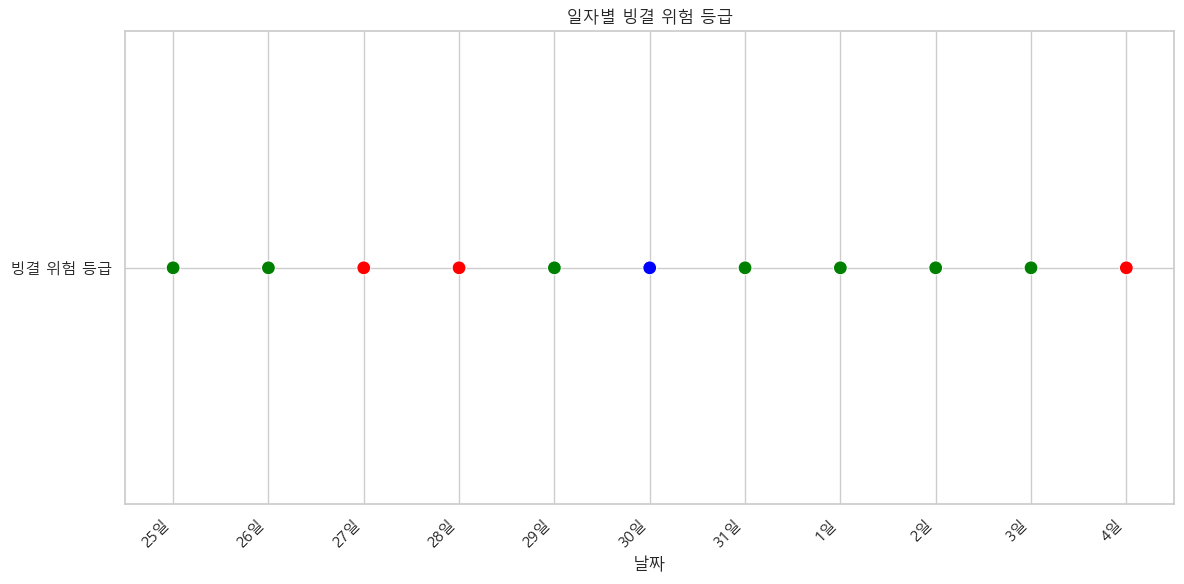

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 엑셀에서 데이터 불러오기
def load_weather_data(file_name="weather_data.xlsx"):
    df = pd.read_excel(file_name)
    return df

def categorize_freezing_risk(temp):
    """기온에 따른 빙결 위험 등급을 반환하는 함수"""
    try:
        # 기온에서 숫자만 추출 (℃ 기호 등 제거)
        temp = float(str(temp).replace('℃', '').replace('°', '').strip())
        if temp < -5:
            return 'J', 'red'  # J (빨강): -5도 미만
        elif -5 <= temp < 0:
            return 'F', 'green'  # F (초록): 0도 ~ -5도
        elif temp >= 0:
            return 'B', 'blue'  # B (파랑): 0도 이상
    except (ValueError, TypeError):
        return '정보 없음', 'gray'  # 기온 정보가 없거나 변환 실패할 경우

def visualize_weather(df):
    """기온에 따른 빙결 위험 등급을 시각화하는 함수"""
    dates = []
    freezing_risks = []
    colors = []

    for index, row in df.iterrows():
        date = row["날짜"]
        min_temp = row["최저 기온"]
        # 최저 기온을 기준으로 위험 등급을 매기기
        grade, color = categorize_freezing_risk(min_temp)
        dates.append(date)
        freezing_risks.append(grade)
        colors.append(color)

    # 시각화
    df["빙결 위험 등급"] = freezing_risks
    df["색상"] = colors

    # 시각화
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x="날짜", y=["빙결 위험 등급"]*len(df), data=df, hue="빙결 위험 등급", palette={"J": "red", "F": "green", "B": "blue", "정보 없음": "gray"}, s=100, legend=None)
    plt.xticks(rotation=45, ha='right')
    plt.title("일자별 빙결 위험 등급")
    plt.xlabel("날짜")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

# 실행 및 출력
df = load_weather_data()  # 엑셀에서 데이터 불러오기
visualize_weather(df)  # 시각화

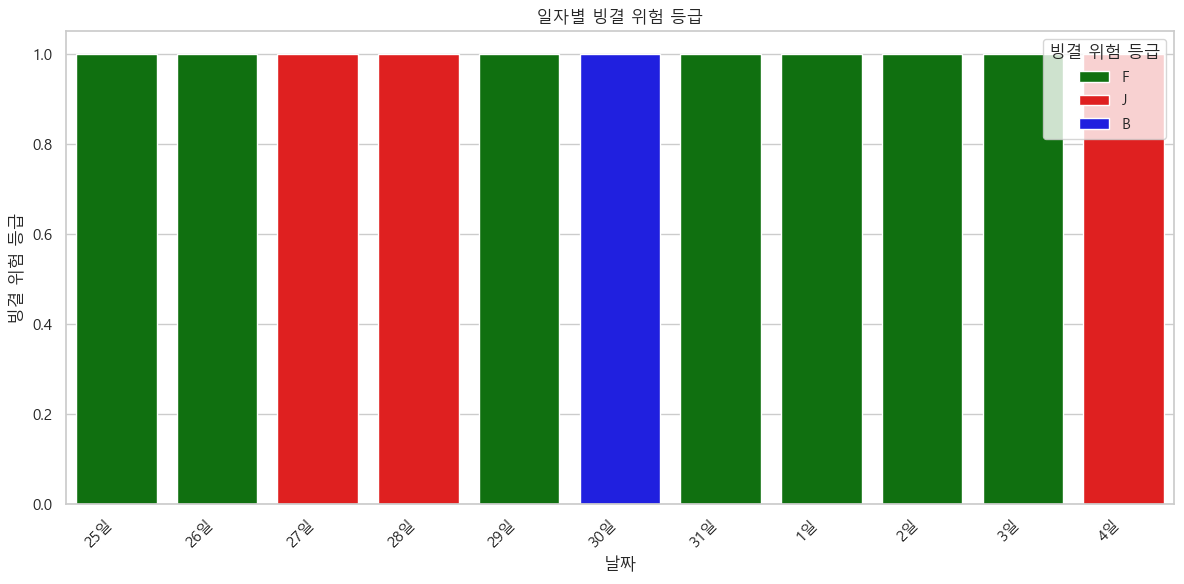

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 엑셀에서 데이터 불러오기
def load_weather_data(file_name="weather_data.xlsx"):
    df = pd.read_excel(file_name)
    return df

def categorize_freezing_risk(temp):
    """기온에 따른 빙결 위험 등급을 반환하는 함수"""
    try:
        # 기온에서 숫자만 추출 (℃ 기호 등 제거)
        temp = float(str(temp).replace('℃', '').replace('°', '').strip())
        if temp < -5:
            return 'J', 'red'  # J (빨강): -5도 미만
        elif -5 <= temp < 0:
            return 'F', 'green'  # F (초록): 0도 ~ -5도
        elif temp >= 0:
            return 'B', 'blue'  # B (파랑): 0도 이상
    except (ValueError, TypeError):
        return '정보 없음', 'gray'  # 기온 정보가 없거나 변환 실패할 경우

def visualize_weather(df):
    """기온에 따른 빙결 위험 등급을 시각화하는 함수"""
    dates = []
    freezing_risks = []
    colors = []

    for index, row in df.iterrows():
        date = row["날짜"]
        min_temp = row["최저 기온"]
        # 최저 기온을 기준으로 위험 등급을 매기기
        grade, color = categorize_freezing_risk(min_temp)
        dates.append(date)
        freezing_risks.append(grade)
        colors.append(color)

    # 시각화
    df["빙결 위험 등급"] = freezing_risks
    df["색상"] = colors

    # 더 직관적인 시각화를 위해 막대그래프 사용
    plt.figure(figsize=(12, 6))
    sns.barplot(x="날짜", y=[1]*len(df), data=df, hue="빙결 위험 등급", palette={"J": "red", "F": "green", "B": "blue", "정보 없음": "gray"}, dodge=False)
    
    # 막대그래프 레이블 설정
    plt.xticks(rotation=45, ha='right')
    plt.title("일자별 빙결 위험 등급")
    plt.xlabel("날짜")
    plt.ylabel("빙결 위험 등급")
    plt.tight_layout()
    
    # 레전드 추가
    plt.legend(title="빙결 위험 등급", loc="upper right")
    
    plt.show()

# 실행 및 출력
df = load_weather_data()  # 엑셀에서 데이터 불러오기
visualize_weather(df)  # 시각화

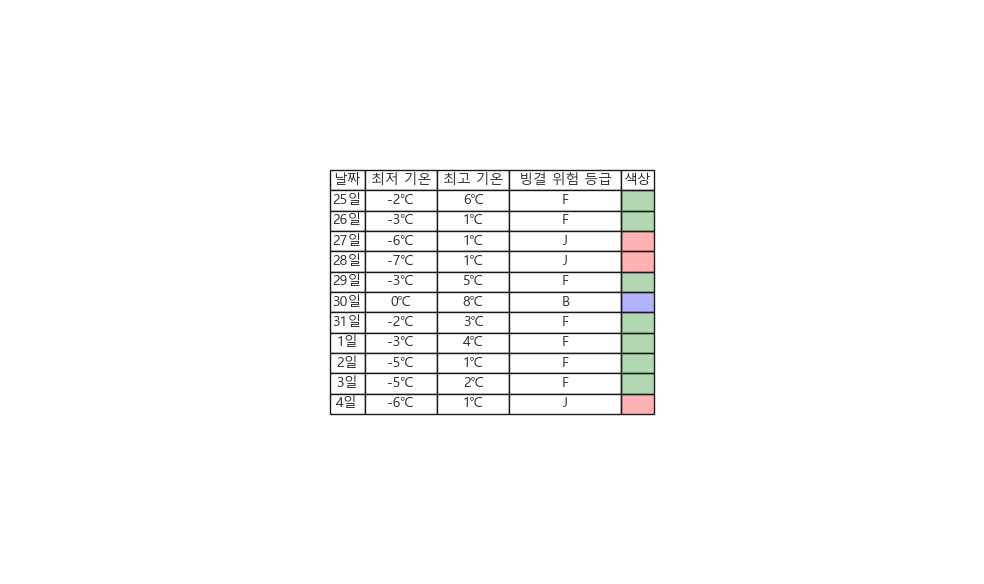

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 제대로 표시

# 엑셀에서 데이터 불러오기
def load_weather_data(file_name="weather_data.xlsx"):
    df = pd.read_excel(file_name)
    return df

def categorize_freezing_risk(temp):
    """기온에 따른 빙결 위험 등급을 반환하는 함수"""
    try:
        # 기온에서 숫자만 추출 (℃ 기호 등 제거)
        temp = float(str(temp).replace('℃', '').replace('°', '').strip())
        if temp < -5:
            return 'J', mcolors.to_rgba('red', alpha=1)  # 연한 빨강
        elif -5 <= temp < 0:
            return 'F', mcolors.to_rgba('green', alpha=1)  # 연한 초록
        elif temp >= 0:
            return 'B', mcolors.to_rgba('blue', alpha=1)  # 연한 파랑
    except (ValueError, TypeError):
        return '정보 없음', mcolors.to_rgba('gray', alpha=1)  # 연한 회색

def visualize_weather_table(df):
    """기온에 따른 빙결 위험 등급을 표로 시각화하는 함수"""
    # 날짜, 최저 기온, 빙결 위험 등급 열 생성
    dates = []
    min_temps = []
    freezing_risks = []
    colors = []  # 색상 리스트

    for index, row in df.iterrows():
        date = row["날짜"]
        min_temp = row["최저 기온"]
        
        # "정보 없음"이 아니면 기온을 기준으로 빙결 위험 등급을 매김
        grade, color = categorize_freezing_risk(min_temp)
        dates.append(date)
        min_temps.append(min_temp)
        freezing_risks.append(grade)
        colors.append(color)

    # 데이터프레임에 결과 저장
    df["최저 기온"] = min_temps
    df["빙결 위험 등급"] = freezing_risks
    df["색상"] = colors  # 색상 열 추가

    # 표 출력
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # 각 행에 대해 색상을 지정
    cell_colors = []
    for i, color in enumerate(colors):
        row_color = ['white', 'white', 'white', color]  # 색상은 마지막 열에만 적용
        cell_colors.append(row_color)

    # 표 그리기
    ax.axis('off')  # 표 주위에 축을 제거
    table = ax.table(cellText=df.values,
                    colLabels=df.columns,
                    loc="center", cellLoc="center")
    
    # 셀 색상 설정
    for (row, col), cell in table.get_celld().items():
        if row > 0 and col == 4:  # 데이터 행의 "색상" 열에만 색상 적용
            grade_color = {'J': mcolors.to_rgba('red', alpha=0.3),
                           'F': mcolors.to_rgba('green', alpha=0.3),
                           'B': mcolors.to_rgba('blue', alpha=0.3)}.get(df.iloc[row - 1]['빙결 위험 등급'], mcolors.to_rgba('gray', alpha=0.3))
            cell.set_facecolor(grade_color)
            cell.set_text_props(text="")  # 텍스트 제거

    # 폰트 크기 설정
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df.columns))))

    plt.tight_layout()
    plt.show()

# 실행 및 출력
df = load_weather_data()  # 엑셀에서 데이터 불러오기
visualize_weather_table(df)  # 시각화
